# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [30]:
# you are free to use any package you deem fit

## Dataset

In [31]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [32]:
#Import Packacges
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create and train a logistic regression model
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
#model = LogisticRegression()
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

## Testing / Optimization

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


## Performance Analysis

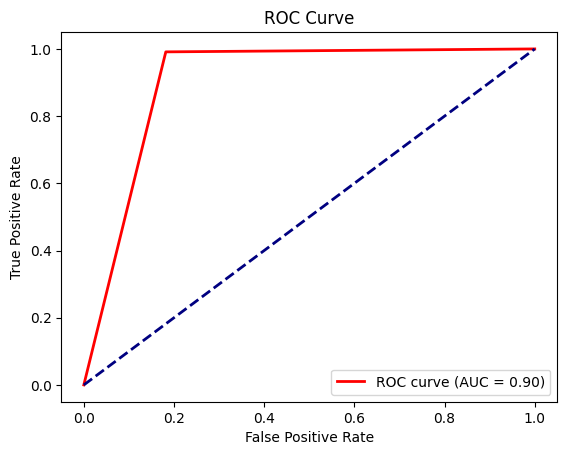

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve for trained model

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## We have an AUC score of 0.90 which is actually very good. Also note that the blue line represents a random classifier (50-50 chance) so we are far from it to the left which is good. We could improve our model through hyperparameter tuning, cross validation, feature engineering, etc...

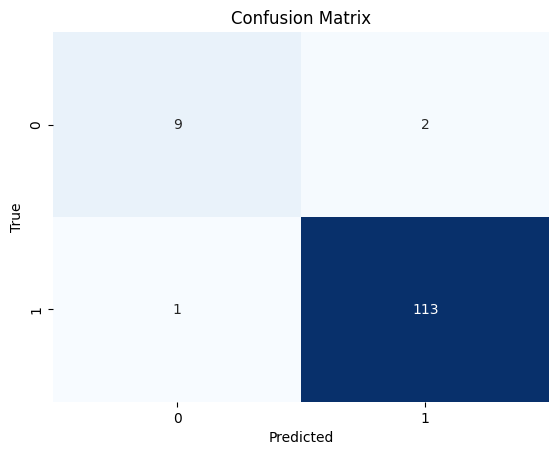

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Assuming you have already trained your binary classification model and made predictions (y_pred and y_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## From the confusion matrix we can see that we have True positives (1-1) of 113 which is actually good since the false positives (0-1) are only 2.
## Also for the True negatives 0-0 we have 9 correctly classified samples and we have 1 samples that are false negatives (1-0) this is due to the case that in our training data we might not have too many samples with a label of 0 to properly train our data. Most of our samples are labeled with 1 so a solution to this might be resampling.